In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('HumanUpdate_all_models_results.csv')
df2 = pd.read_csv('DemonUpdate_all_models_results.csv')

def remove_first_in_every_seven(df):
    return df.drop(index=[i for i in range(len(df)) if i % 7 == 0])

df1_cleaned = remove_first_in_every_seven(df1)
df2_cleaned = remove_first_in_every_seven(df2)

merged_df = pd.concat([df1, df2], ignore_index=True)

C:\Users\17229\AppData\Local\Temp\ipykernel_13688\3021565947.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


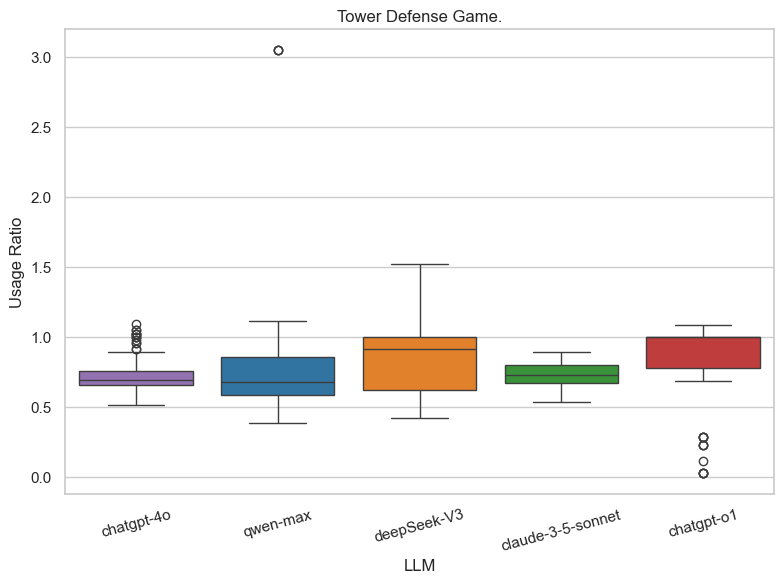

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 处理 human 数据
df_human = merged_df[['human_cost', 'human_LLM']].copy()
human_budget = 4500
df_human['usage_ratio'] = df_human['human_cost'] / human_budget
df_human.rename(columns={'human_cost': 'cost', 'human_LLM': 'LLM'}, inplace=True)

# 处理 demon 数据
df_demon = merged_df[['demon_cost', 'demon_LLM']].copy()
demon_budget = 3500
df_demon['usage_ratio'] = df_demon['demon_cost'] / demon_budget
df_demon.rename(columns={'demon_cost': 'cost', 'demon_LLM': 'LLM'}, inplace=True)

# 合并 human 和 demon 数据
df_combined = pd.concat([df_human, df_demon], ignore_index=True)

# 自定义调色板和展示顺序
custom_palette = {
    'qwen-max': '#1f77b4',
    'deepSeek-V3': '#ff7f0e',
    'claude-3-5-sonnet': '#2ca02c',
    'chatgpt-o1': '#d62728',
    'chatgpt-4o': '#9467bd'
}
desired_order = [
    'chatgpt-4o',
    'qwen-max', 
    'deepSeek-V3', 
    'claude-3-5-sonnet', 
    'chatgpt-o1'
]

# 设置主题并绘制箱形图
sns.set_theme(style='whitegrid')
plt.figure(figsize=(8,6))
ax = sns.boxplot(
    data=df_combined,
    x='LLM',
    y='usage_ratio',
    order=desired_order,
    palette=custom_palette
)

plt.xticks(rotation=15)
plt.title("Tower Defense Game.")
plt.xlabel("LLM")
plt.ylabel("Usage Ratio")
plt.tight_layout()
plt.show()


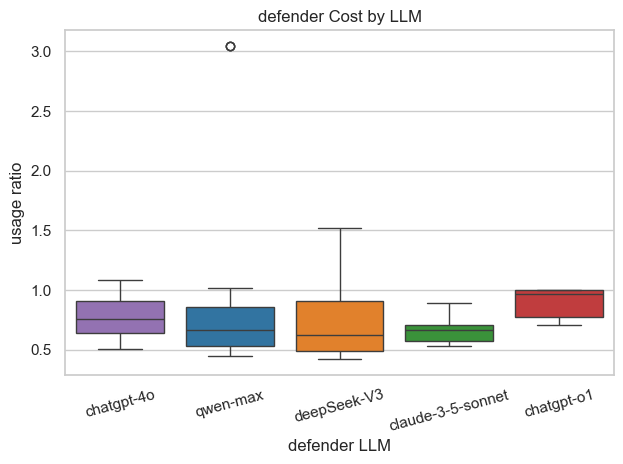

In [26]:
df_defender = merged_df[['human_cost', 'human_LLM']].copy()

human_budget = 4500
df_defender['usage_ratio'] = (df_defender['human_cost'] / human_budget) 

llms = df_defender['human_LLM'].unique()   
colors = sns.color_palette('Set2', n_colors=len(llms))

sns.set_theme(style='whitegrid')  

custom_palette = {
    'qwen-max': '#1f77b4',
    'deepSeek-V3': '#ff7f0e',
    'claude-3-5-sonnet': '#2ca02c',
    'chatgpt-o1': '#d62728',
    'chatgpt-4o': '#9467bd'
}

ax = sns.boxplot(
    data=df_defender,
    x='human_LLM',      
    y='usage_ratio',     
    hue='human_LLM',    
    dodge=False,           
    palette=custom_palette         
)



plt.xticks(rotation=15)
plt.title("defender Cost by LLM")
plt.xlabel("defender LLM")
plt.ylabel("usage ratio")

plt.tight_layout()
plt.show()

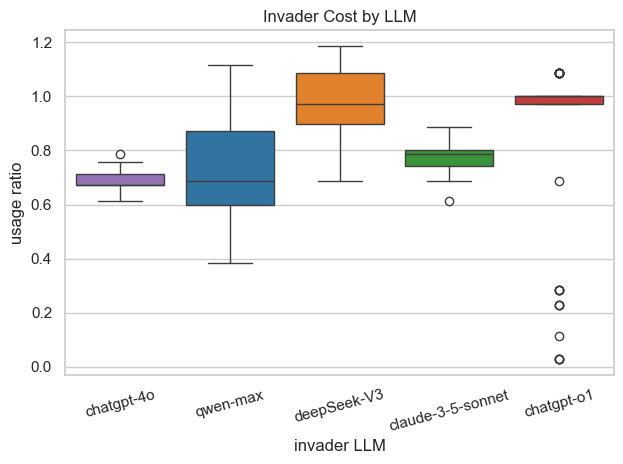

In [27]:
df_defender = merged_df[['demon_cost', 'demon_LLM']].copy()

human_budget = 3500
df_defender['usage_ratio'] = (df_defender['demon_cost'] / human_budget) 

llms = df_defender['demon_LLM'].unique()   

custom_palette = {
    'qwen-max': '#1f77b4',
    'deepSeek-V3': '#ff7f0e',
    'claude-3-5-sonnet': '#2ca02c',
    'chatgpt-o1': '#d62728',
    'chatgpt-4o': '#9467bd'
}
sns.set_theme(style='whitegrid')  
desired_order = [
    'chatgpt-4o',
    'qwen-max', 
    'deepSeek-V3', 
    'claude-3-5-sonnet', 
    'chatgpt-o1'
]
ax = sns.boxplot(
    data=df_defender,
    x='demon_LLM',      
    y='usage_ratio',     
    hue='demon_LLM',    
    dodge=False,  
    order=desired_order,         
    palette=custom_palette         
)


plt.xticks(rotation=15)
plt.title("Invader Cost by LLM")
plt.xlabel("invader LLM")
plt.ylabel("usage ratio")

plt.tight_layout()
plt.show()

In [ ]:
defender_avg = (
    merged_df.groupby('defender_LLM')['defender_cost']
      .mean()
      .reset_index()
      .rename(columns={'defender_LLM': 'model', 'defender_cost': 'avg_defender_cost'})
)

# 计算每个模型作为 demon 时的平均 demon_cost
invader_avg = (
    merged_df.groupby('invader_LLM')['invader_cost']
      .mean()
      .reset_index()
      .rename(columns={'invader_LLM': 'model', 'invader_cost': 'avg_invader_cost'})
)

# 合并两个结果（外连接，确保所有模型都显示）
merged_avg = pd.merge(defender_avg, invader_avg, on='model', how='outer')

,human_cost,demon_cost,winner,lost_row,human_LLM,demon_LLM
0,2900,2100,Demon,4.0,chatgpt-4o,qwen-max
1,2700,2100,Demon,2.0,chatgpt-4o,qwen-max
2,2700,1350,Demon,1.0,chatgpt-4o,qwen-max
3,3400,1350,Human,NaN,chatgpt-4o,qwen-max
4,3400,2050,Human,NaN,chatgpt-4o,qwen-max
...,...,...,...,...,...,...
275,2900,3400,Demon,0.0,claude-3-5-sonnet,chatgpt-o1
276,2900,3500,Demon,0.0,claude-3-5-sonnet,chatgpt-o1
277,3400,3500,Human,NaN,claude-3-5-sonnet,chatgpt-o1
278,3400,3500,Demon,2.0,claude-3-5-sonnet,chatgpt-o1


In [4]:
human_avg = (
    merged_df.groupby('human_LLM')['human_cost']
      .mean()
      .reset_index()
      .rename(columns={'human_LLM': 'model', 'human_cost': 'avg_human_cost'})
)

# 计算每个模型作为 demon 时的平均 demon_cost
demon_avg = (
    merged_df.groupby('demon_LLM')['demon_cost']
      .mean()
      .reset_index()
      .rename(columns={'demon_LLM': 'model', 'demon_cost': 'avg_demon_cost'})
)

# 合并两个结果（外连接，确保所有模型都显示）
merged_avg = pd.merge(human_avg, demon_avg, on='model', how='outer')

In [5]:
merged_avg

,model,avg_human_cost,avg_demon_cost
0,chatgpt-4o,3551.785714,2406.250000
1,chatgpt-o1,4016.071429,2914.285714
2,claude-3-5-sonnet,2980.357143,2726.785714
3,deepSeek-V3,3106.250000,3299.107143
4,qwen-max,3599.107143,2520.535714


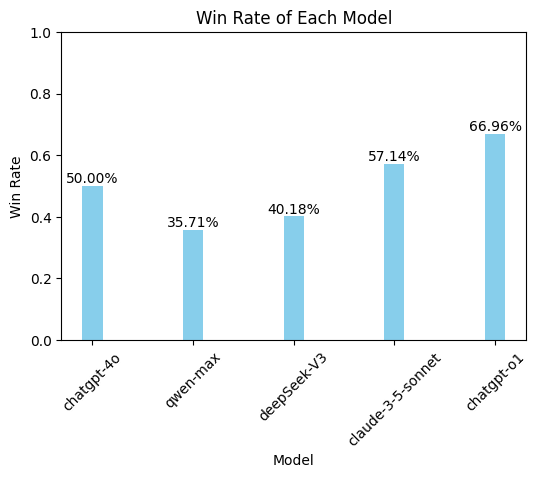

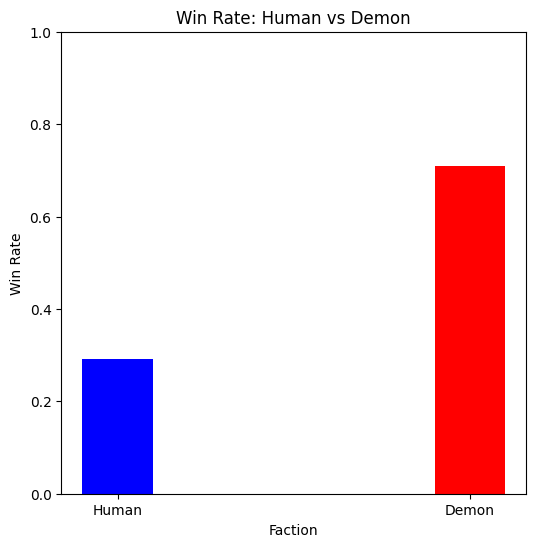

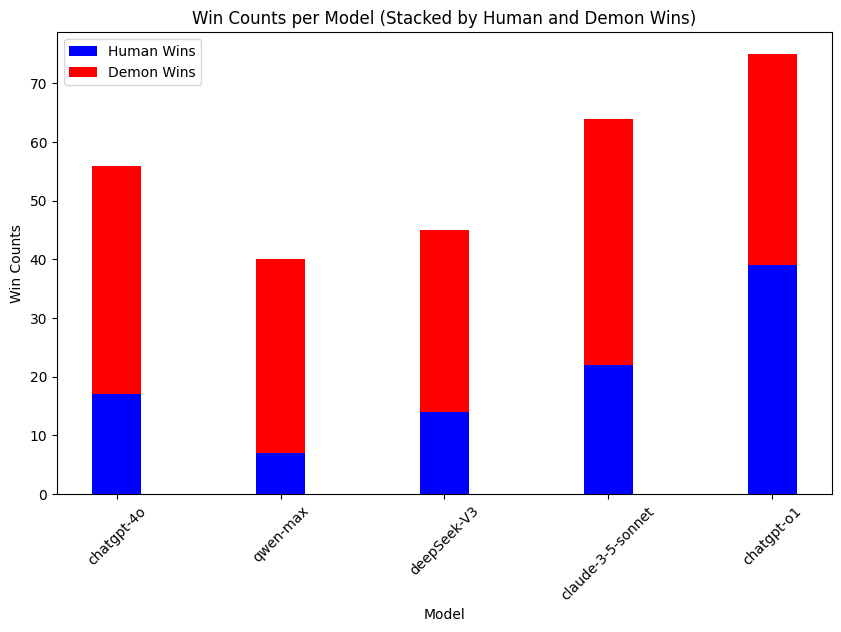

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 假设已经读取数据到 DataFrame df
# df = pd.read_csv('matches.csv')

models = ['chatgpt-4o', 'qwen-max', 'deepSeek-V3', 'claude-3-5-sonnet', 'chatgpt-o1']

# 初始化一个嵌套字典，用于统计两个模型之间的胜负情况
results = {
    m: {n: {'wins': 0, 'losses': 0} for n in models if n != m}
    for m in models
}

# 遍历 DataFrame 每一行，根据 winner 来更新字典中的统计信息
for idx, row in merged_df.iterrows():
    # 取得人类和恶魔阵营所用的模型
    human_model = row['human_LLM']
    demon_model = row['demon_LLM']
    winner_side = row['winner']
    
    # 判断获胜模型
    if winner_side == 'Human':
        winner_model = human_model
        loser_model = demon_model
    elif winner_side == 'Demon':
        winner_model = demon_model
        loser_model = human_model
    else:
        # 数据异常则跳过
        continue

    # 如果获胜和失败的模型都在关注的模型列表中，则更新统计数据
    if winner_model in models and loser_model in models:
        results[winner_model][loser_model]['wins'] += 1
        results[loser_model][winner_model]['losses'] += 1

model_win_rates = {}
for m in models:
    wins = sum(results[m][opp]['wins'] for opp in results[m])
    losses = sum(results[m][opp]['losses'] for opp in results[m])
    total_games = wins + losses
    win_rate = wins / total_games if total_games > 0 else 0
    model_win_rates[m] = win_rate

plt.figure(figsize=(6,4))
bars = plt.bar(model_win_rates.keys(), model_win_rates.values(), color='skyblue', width=0.2)
plt.xlabel("Model")
plt.ylabel("Win Rate")
plt.title("Win Rate of Each Model")
plt.ylim(0, 1)  # 胜率范围在 0 到 1
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 柱子中点位置
        height,                             # 在柱子顶部
        f'{height:.2%}',                    # 格式化为百分比
        ha='center', 
        va='bottom'
    )

plt.show()
plt.show()

# 3.2 绘制 Human vs Demon 阵营的总体胜率柱状图（窄一点）
human_total_wins = 0
demon_total_wins = 0
for idx, row in df2_cleaned.iterrows():
    if row['winner'] == 'Human':
        human_total_wins += 1
    elif row['winner'] == 'Demon':
        demon_total_wins += 1

total_matches = human_total_wins + demon_total_wins
human_rate = human_total_wins / total_matches if total_matches > 0 else 0
demon_rate = demon_total_wins / total_matches if total_matches > 0 else 0

plt.figure(figsize=(6,6))
# 为两个柱子也设置较窄宽度，比如0.4
plt.bar(["Human", "Demon"], [human_rate, demon_rate], color=['blue', 'red'], width=0.2)
plt.xlabel("Faction")
plt.ylabel("Win Rate")
plt.title("Win Rate: Human vs Demon")
plt.ylim(0, 1)
plt.show()

# 3.3 绘制每个模型的胜场数堆叠柱状图（区分作为 Human 获胜和作为 Demon 获胜），柱子窄一点
human_wins_per_model = {m: 0 for m in models}
demon_wins_per_model = {m: 0 for m in models}

for idx, row in merged_df.iterrows():
    winner_side = row['winner']
    if winner_side == 'Human':
        if row['human_LLM'] in models:
            human_wins_per_model[row['human_LLM']] += 1
    elif winner_side == 'Demon':
        if row['demon_LLM'] in models:
            demon_wins_per_model[row['demon_LLM']] += 1

x = np.arange(len(models))
width = 0.3
human_wins_list = [human_wins_per_model[m] for m in models]
demon_wins_list = [demon_wins_per_model[m] for m in models]

plt.figure(figsize=(10,6))
plt.bar(x, human_wins_list, width, label='Human Wins', color='blue')
plt.bar(x, demon_wins_list, width, bottom=human_wins_list, label='Demon Wins', color='red')
plt.xlabel("Model")
plt.ylabel("Win Counts")
plt.title("Win Counts per Model (Stacked by Human and Demon Wins)")
plt.xticks(x, models, rotation=45)
plt.legend()
plt.show()

In [5]:
filtered_df = merged_df[merged_df["demon_LLM"] == "chatgpt-4o"]


In [6]:
human_avg = (
    filtered_df.groupby('human_LLM')['human_cost']
      .mean()
      .reset_index()
      .rename(columns={'human_LLM': 'model', 'human_cost': 'avg_human_cost'})
)

# 计算每个模型作为 demon 时的平均 demon_cost
demon_avg = (
    filtered_df.groupby('demon_LLM')['demon_cost']
      .mean()
      .reset_index()
      .rename(columns={'demon_LLM': 'model', 'demon_cost': 'avg_demon_cost'})
)

# 合并两个结果（外连接，确保所有模型都显示）
merged_avg = pd.merge(human_avg, demon_avg, on='model', how='outer')

In [8]:
merged_avg 

,model,avg_human_cost,avg_demon_cost
0,chatgpt-o1,4233.333333,NaN
1,claude-3-5-sonnet,3008.333333,NaN
2,deepSeek-V3,3479.166667,NaN
3,qwen-max,3100.000000,NaN
4,chatgpt-4o,NaN,2415.625


In [6]:
df1

,human_cost,demon_cost,winner,lost_row,human_LLM,demon_LLM
0,2900,2100,Demon,4.0,chatgpt-4o,qwen-max
1,2700,2100,Demon,2.0,chatgpt-4o,qwen-max
2,2700,1350,Demon,1.0,chatgpt-4o,qwen-max
3,3400,1350,Human,NaN,chatgpt-4o,qwen-max
4,3400,2050,Human,NaN,chatgpt-4o,qwen-max
...,...,...,...,...,...,...
135,3700,2600,Demon,4.0,chatgpt-o1,chatgpt-4o
136,4200,2600,Human,NaN,chatgpt-o1,chatgpt-4o
137,4200,2550,Human,NaN,chatgpt-o1,chatgpt-4o
138,4500,2550,Human,NaN,chatgpt-o1,chatgpt-4o


In [10]:
unique_human_models = df1["human_LLM"].unique()
unique_demon_models = df1["demon_LLM"].unique()

unique_human_models, unique_demon_models

(array(['chatgpt-4o', 'qwen-max', 'deepSeek-V3', 'claude-3-5-sonnet',
        'chatgpt-o1'], dtype=object),
 array(['qwen-max', 'deepSeek-V3', 'claude-3-5-sonnet', 'chatgpt-o1',
        'chatgpt-4o'], dtype=object))

In [11]:
budget_map = {'human': 4500, 'demon': 3500}

# 将每局数据拆分为两条记录
records = []
for idx, row in df1.iterrows():
    # human 记录
    records.append({
        'global_index': idx,  # 原始数据的行号
        'model': row['human_LLM'],
        'role': 'human',
        'cost': row['human_cost'],
        'budget': budget_map['human'],
        'won': (row['winner'] == 'Human'),
        'lost_row': row['lost_row']
    })
    # demon 记录
    records.append({
        'global_index': idx,
        'model': row['demon_LLM'],
        'role': 'demon',
        'cost': row['demon_cost'],
        'budget': budget_map['demon'],
        'won': (row['winner'] == 'Demon'),
        'lost_row': row['lost_row']
    })

df_models = pd.DataFrame(records)

In [12]:
# 首先按模型分组，并按原始数据顺序排序（使用global_index确保同局数据顺序）
df_models = df_models.sort_values(['model', 'global_index']).reset_index(drop=True)

# 创建一个字典保存结果
results = {}

for model, group in df_models.groupby('model'):
    group = group.reset_index(drop=True)
    total_games = len(group)
    
    # 违规出局：本局成本 > budget 且判定为失败 (won==False)
    overbudget_fail_indices = group.index[(group['cost'] > group['budget']) & (~group['won'])].tolist()
    
    corrections = 0
    for i in overbudget_fail_indices:
        # 检查该模型下次出现的记录（i+1），如果存在且成本<=预算
        if i + 1 < total_games:
            if group.loc[i+1, 'cost'] <= group.loc[i+1, 'budget']:
                corrections += 1
    results[model] = {
        'total_games': total_games,
        'overbudget_failures': len(overbudget_fail_indices),
        'corrections': corrections,
        'correction_rate': corrections / len(overbudget_fail_indices) if len(overbudget_fail_indices) > 0 else None
    }

results_df = pd.DataFrame(results).T
results_df


,total_games,overbudget_failures,corrections,correction_rate
chatgpt-4o,56.0,4.0,1.0,0.250000
chatgpt-o1,56.0,8.0,4.0,0.500000
claude-3-5-sonnet,56.0,0.0,0.0,NaN
deepSeek-V3,56.0,12.0,2.0,0.166667
qwen-max,56.0,1.0,1.0,1.000000
